# Setup
Make sure there is folder in the same directory as this notebook with subfolders containing images of each class. For example, a folder named 'monsters' with two subfolders of images named 'ghosts' and 'goblins'.

In [6]:
from fastai.vision import *

In [14]:
path = Path('weird_stuff')

# Get and View Data

randomly grab the data in train and validation sets from subfolders of classes

In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
print("Number of classes: ", data.c)
print("Class names: ", data.classes)
print("Number of training images: ", len(data.train_ds))
print("Number of validation images: ", len(data.valid_ds))

Number of classes:  2
Class names:  ['skeleton', 'toilet']
Number of training images:  131
Number of validation images:  32


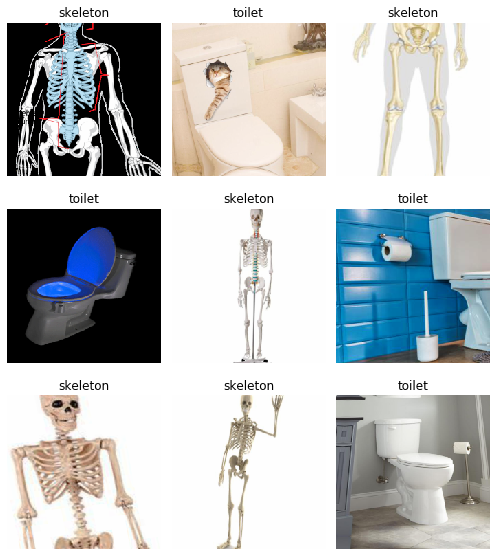

In [18]:
data.show_batch(rows=3, figsize=(7,8))

# Train Model

pass the data and model creation function to cnn_learner with the desired metric such as accuracy or error_rate

In [19]:
learner = cnn_learner(data, models.resnet34, metrics=accuracy)

now cycle through data once for a specified number of epochs

In [20]:
learner.fit_one_cycle(4)

now that it's trained, save the model at this stage

In [21]:
learner.save('stage-1')

the model is frozen after a save, so unfreeze it to keep working

In [22]:
learner.unfreeze()

find the learning rate and plot it

In [23]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


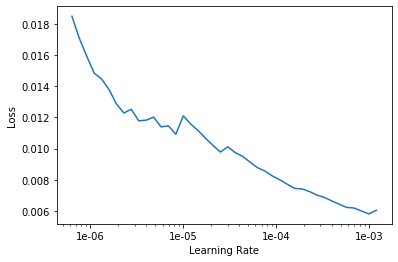

In [24]:
learner.recorder.plot()

train again using a maximum learning rate determined from the plot above - 
choose a range with the largest slope

In [26]:
learner.fit_one_cycle(1, max_lr=slice(3e-5,3e-4))

save work at this stage

In [27]:
learner.save('stage-2')

# Interpret Results

load the last save

In [28]:
learner.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
skeleton,skeleton,skeleton,skeleton,skeleton
Path: weird_stuff;

Valid: LabelList (32 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
toilet,toilet,toilet,skeleton,toilet
Path: weird_stuff;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, af

pass the learner to the classification interpretation function

In [29]:
interpretation = ClassificationInterpretation.from_learner(learner)

create a confusion matrix to see which images are not classifying well - clean data and retrain from start if needed

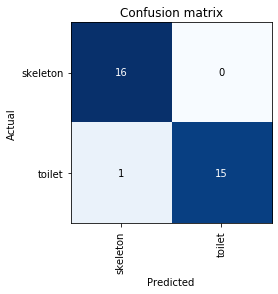

In [30]:
interpretation.plot_confusion_matrix()

export the contents of our Learner object for use in production

This will create a file named 'export.pkl' in the working data directory that contains the model, the weights, and metadata

the exports.pkl file can be loaded in to make predictions without going through training steps

In [31]:
learner.export()

# Use Model

use the CPU here for inference because the GPU is only needed for training

In [32]:
defaults.device = torch.device('cpu')

upload a new prediction image to working data directory

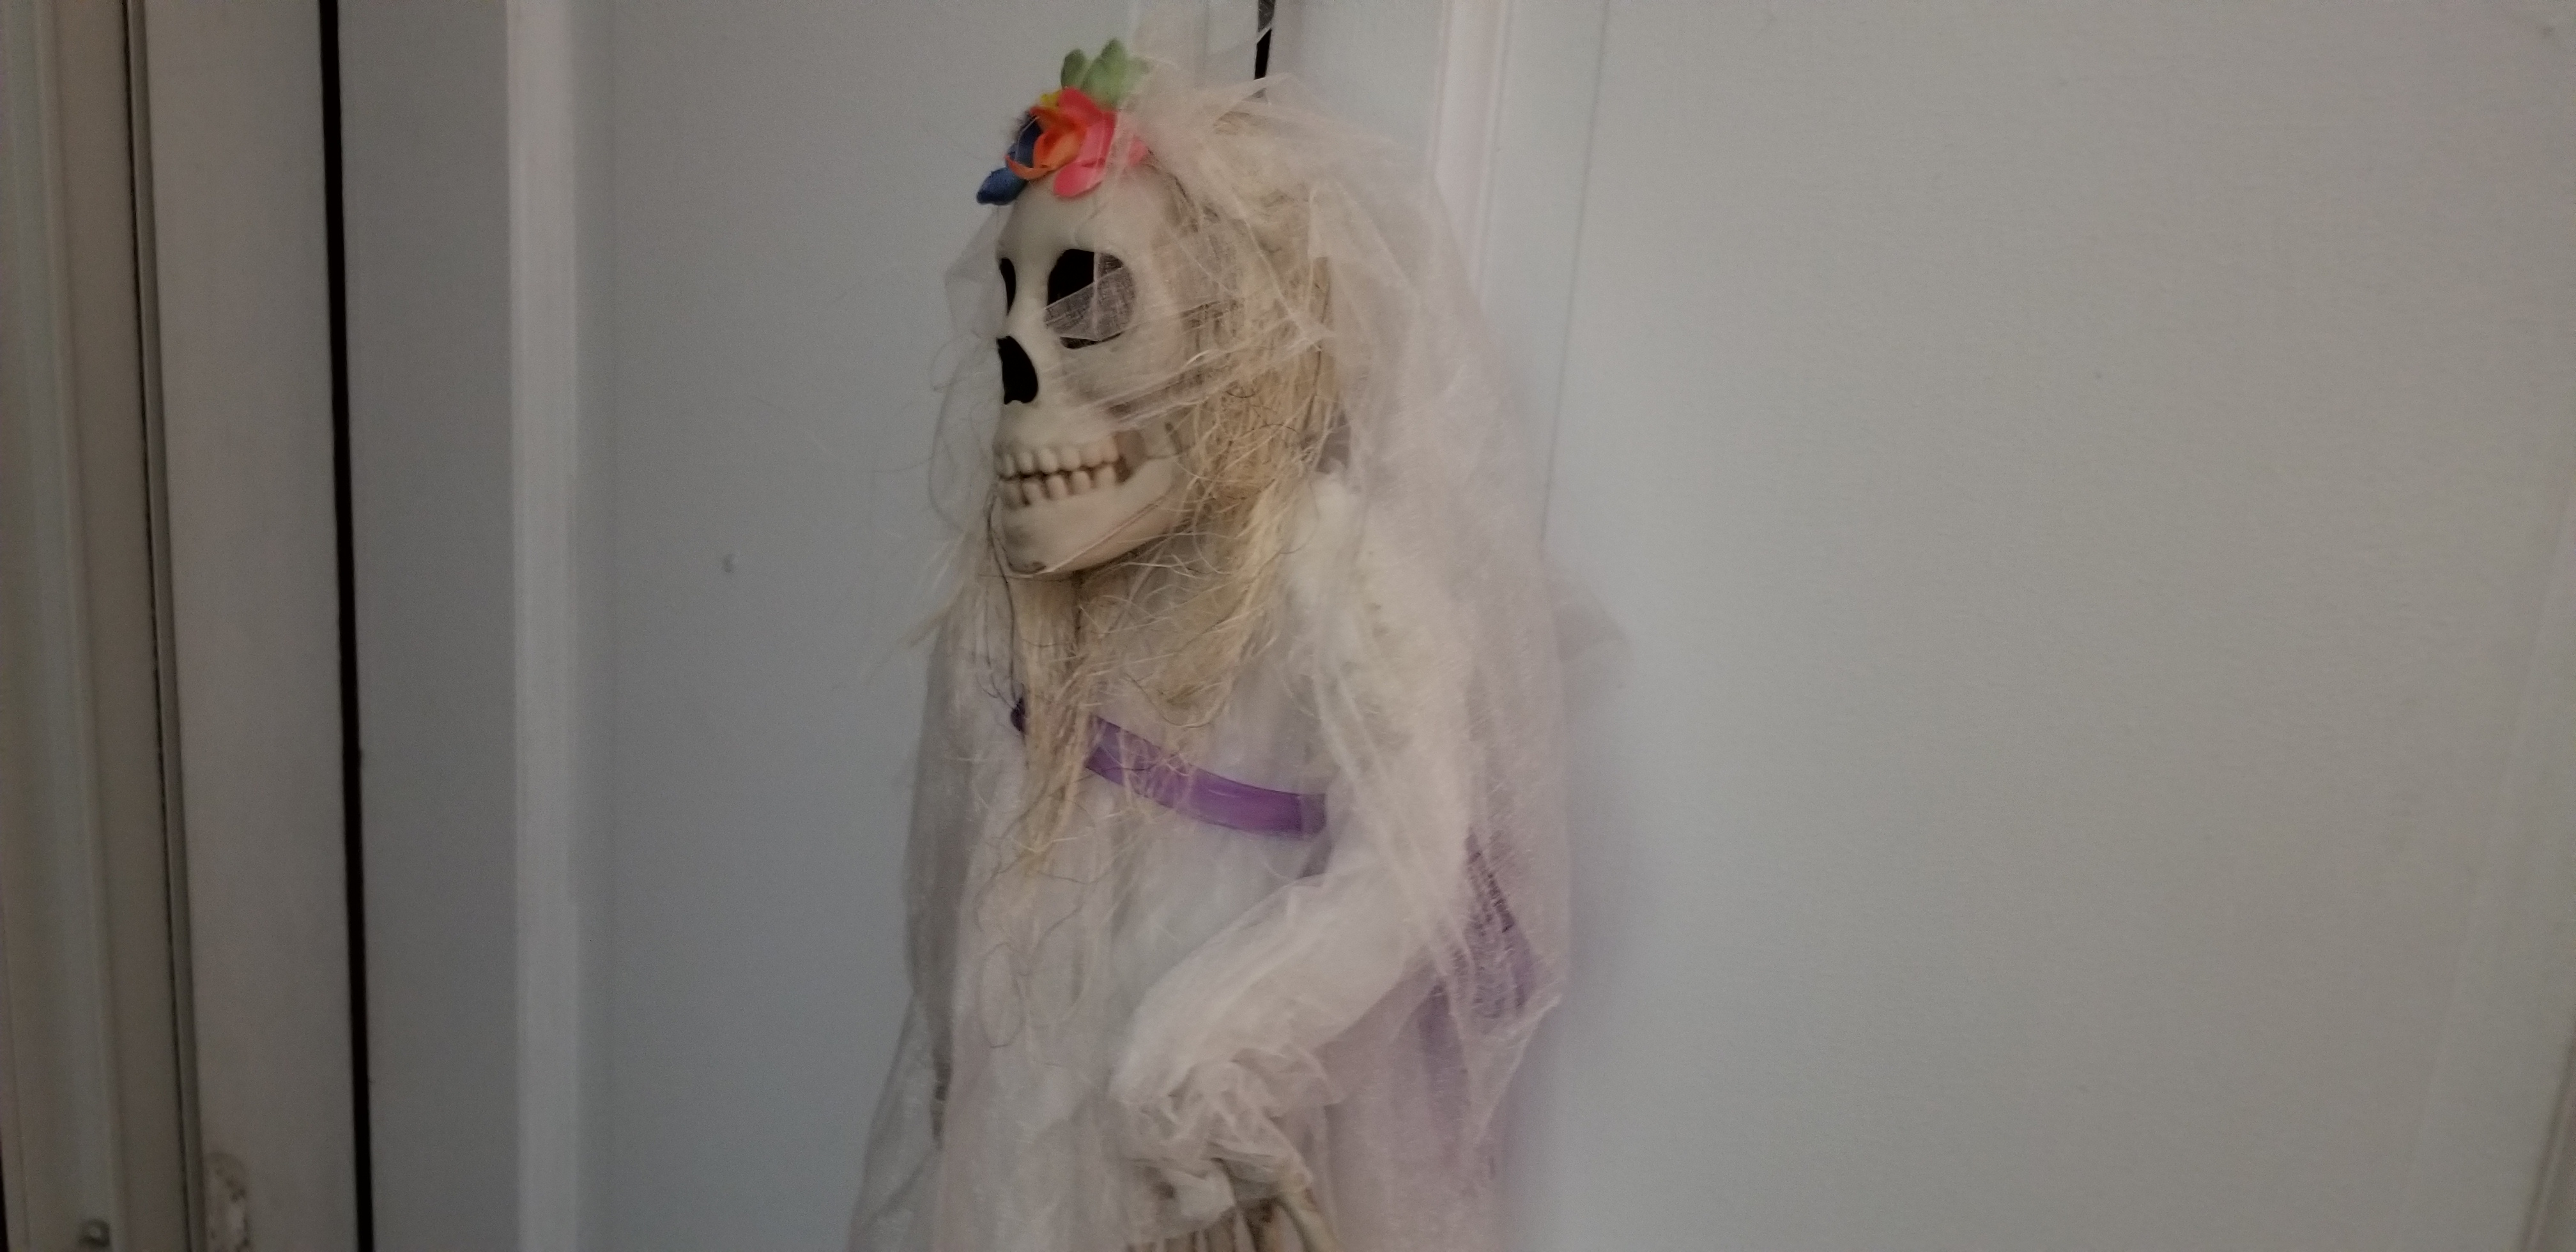

In [36]:
img = open_image(path/'20191009_192654.jpg')
img

load in the trained Learner (model, weights, metadata)

In [37]:
monster_learner = load_learner(path)

make a prediction!

In [38]:
monster_learner.predict(img)

(Category skeleton, tensor(0), tensor([9.9989e-01, 1.1488e-04]))